# Operaciones CRUD en Riak con Python

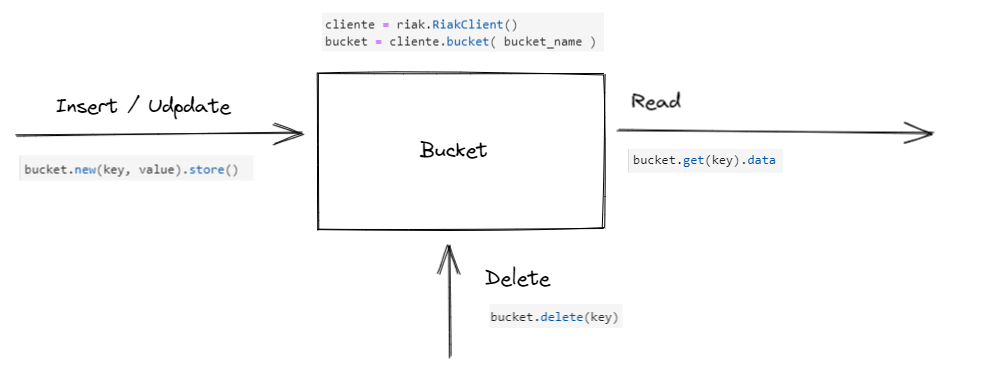

## Conexión a Riak

In [ ]:
import riak

In [ ]:
cliente = riak.RiakClient()
print("¿Está Riak disponible?", cliente.ping())

In [ ]:
!curl -s http://localhost:8098/stats  | jq .riak_kv_version

## Insertar valores

In [ ]:
bucket = cliente.bucket("bucket_name")

In [ ]:
key1 = "key_one"
val1 = 1
bucket.new(key1, val1).store()

In [ ]:
key2 = "key_two"
val2 = "Dos"
bucket.new(key2, val2).store()

In [ ]:
key3 = "key_three"
val3 = {
    "val1" : 1,
    "val2" : "Dos",
    "val3" : [1, 2, 3, 4, 5],
    
}

In [ ]:
bucket.new(key3, val3).store()

## Insertando imágenes

In [ ]:
image_bucket = cliente.bucket('images')

image_bucket.new_from_file('image_key', './images/demo.image.jpg').store()

## Recuperando información

In [ ]:
from pprintpp import pprint as pp
bucket = cliente.bucket("bucket_name")

print("key_one:", bucket.get("key_one").data)
print("key_two:", bucket.get("key_two").data)
data3 = bucket.get("key_three").data

print("key_three: ")
pp(data3)

In [ ]:
!curl http://localhost:8098/riak/bucket_name/key_one

In [ ]:
!curl http://localhost:8098/riak/bucket_name/key_two

In [ ]:
!curl -s http://localhost:8098/riak/bucket_name/key_three | jq

http://localhost:8098/riak/images/image_key

## Actualizando Información

In [ ]:
key1 = "key_one"
val1 = 2
bucket.new(key1, val1).store()

In [ ]:
print("key_one:", bucket.get("key_one").data)

## Borrando Información

In [ ]:
key1 = "key_one"
bucket.delete(key1)

In [ ]:
print("key_one:", bucket.get("key_one").data)